Python and R workflow in one notebook
==

In [2]:
# Install libraries
# add "%%capture" magic function to hide output (works in Python)
%%capture
!pip install --upgrade geopandas mapclassify

In [3]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

Data
==

GDrive mount
--

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [67]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
ward_lookups_dir = f"{project_dir}/lookups/2022_wards"
crime_dir = f"{project_dir}/crime"

# Outputs
out_dir = f"{project_dir}/crime"

In [68]:
!mkdir -p '{out_dir}'

Lookups
--
Used to match up LSOAs with 2022 electoral wards

In [69]:
# All LSOAs and their 2022 wards in Lewisham
lsoa_wd22_join = pd.read_csv(f"{ward_lookups_dir}/lbl_lsoa11_wd22_proposed.csv")
lsoa_wd22_join = lsoa_wd22_join[['LSOA11CD', 'WD22CD_proposed']]
lsoa_wd22_join.head()

,LSOA11CD,WD22CD_proposed
0,E01003316,E05013729
1,E01003314,E05013729
2,E01003312,E05013729
3,E01003313,E05013729
4,E01003310,E05013729


In [70]:
# LSOAs in Lewisham
lbl_lsoa_list = lsoa_wd22_join.LSOA11CD.unique()
len(lbl_lsoa_list)

169

In [86]:
# Crime data source: https://data.police.uk/data/
# LSOA level
df = pd.read_csv(f"{out_dir}/2021-09-metropolitan-street.csv")
df.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,83da2d94838f010f645244f915376fe87a8629abf5c47b...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-3.376052,54.663060,On or near Parklands Drive,E01019087,Allerdale 007D,Vehicle crime,Under investigation,NaN
1,9348af7f46329886ab9a42482d860e346da42483048a26...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.535678,50.804151,On or near South Terrace,E01031400,Arun 011A,Violence and sexual offences,Under investigation,NaN
2,6601ff35897e249d0b5492b7787304256a760c13bf1503...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.605630,50.792228,On or near Coldicott Mews,E01031440,Arun 013D,Violence and sexual offences,Under investigation,NaN
3,e4e622a6600bc2aec6949242c2b60c61694539b77167d6...,2021-09,Metropolitan Police Service,Metropolitan Police Service,0.869695,51.108273,On or near Steeds Lane,E01024034,Ashford 010D,Violence and sexual offences,Under investigation,NaN
4,1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11c...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.777859,51.829369,On or near Marshalls Lea,E01017641,Aylesbury Vale 007A,Violence and sexual offences,Under investigation,NaN


In [87]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [88]:
# rename/standardise column names
df = df.rename(columns={'Crime ID': 'Crime_id', 'Reported by': 'Reported_by', 
                        'Falls within': 'Falls_within', 'LSOA code': 'LSOA11CD',
                        'LSOA name': 'LSOA11NM', 'Crime type': 'Crime_yype',
                        'Last outcome category': 'Last_outcome_category'})
df.columns

Index(['Crime_id', 'Month', 'Reported_by', 'Falls_within', 'Longitude',
       'Latitude', 'Location', 'LSOA11CD', 'LSOA11NM', 'Crime_yype',
       'Last_outcome_category', 'Context'],
      dtype='object')

In [89]:
# Limit to Lewisham LSOAs
dflbl = df[df.LSOA11CD.isin(lbl_lsoa_list)].copy()

In [90]:
dflbl.head()

,Crime_id,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA11CD,LSOA11NM,Crime_yype,Last_outcome_category,Context
56602,NaN,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.035625,51.490037,On or near Windlass Place,E01003244,Lewisham 001A,Anti-social behaviour,NaN,NaN
56603,NaN,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.035625,51.490037,On or near Windlass Place,E01003244,Lewisham 001A,Anti-social behaviour,NaN,NaN
56604,c6d72bbcbfa4e19a77d548b0e7f3cfa70b71c334fbb8ac...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.033288,51.488452,On or near Bowditch,E01003244,Lewisham 001A,Burglary,Under investigation,NaN
56605,529ba7f55a745b4704c2356b603e492df9b5c49a5b9839...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.035625,51.490037,On or near Windlass Place,E01003244,Lewisham 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
56606,7d8261d1f080c9d5389e4f03398a1977c042762b867f28...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.033288,51.488452,On or near Bowditch,E01003244,Lewisham 001A,Other theft,Under investigation,NaN


In [94]:
dflbl.to_csv(f"{out_dir}/lbl_crime_test.csv", index=False)

In [129]:
dflbl = pd.read_csv(f"{out_dir}/2021-09-metropolitan-street.csv")
dflbl.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,83da2d94838f010f645244f915376fe87a8629abf5c47b...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-3.376052,54.663060,On or near Parklands Drive,E01019087,Allerdale 007D,Vehicle crime,Under investigation,NaN
1,9348af7f46329886ab9a42482d860e346da42483048a26...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.535678,50.804151,On or near South Terrace,E01031400,Arun 011A,Violence and sexual offences,Under investigation,NaN
2,6601ff35897e249d0b5492b7787304256a760c13bf1503...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.605630,50.792228,On or near Coldicott Mews,E01031440,Arun 013D,Violence and sexual offences,Under investigation,NaN
3,e4e622a6600bc2aec6949242c2b60c61694539b77167d6...,2021-09,Metropolitan Police Service,Metropolitan Police Service,0.869695,51.108273,On or near Steeds Lane,E01024034,Ashford 010D,Violence and sexual offences,Under investigation,NaN
4,1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11c...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.777859,51.829369,On or near Marshalls Lea,E01017641,Aylesbury Vale 007A,Violence and sexual offences,Under investigation,NaN


In [130]:
dflbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90881 entries, 0 to 90880
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               68977 non-null  object 
 1   Month                  90881 non-null  object 
 2   Reported by            90881 non-null  object 
 3   Falls within           90881 non-null  object 
 4   Longitude              88916 non-null  float64
 5   Latitude               88916 non-null  float64
 6   Location               90881 non-null  object 
 7   LSOA code              88916 non-null  object 
 8   LSOA name              88916 non-null  object 
 9   Crime type             90881 non-null  object 
 10  Last outcome category  68977 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 8.3+ MB


In [131]:
# Pandas dataframe to R data frame
!pip3 install rpy2
%load_ext rpy2.ipython
%R -i dflbl


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [132]:
%%R

head(dflbl)

                                                          Crime ID   Month
0 83da2d94838f010f645244f915376fe87a8629abf5c47bc5a2658e67a5890258 2021-09
1 9348af7f46329886ab9a42482d860e346da42483048a266ec43cdaf33ef57f62 2021-09
2 6601ff35897e249d0b5492b7787304256a760c13bf15033892a7fd35765ebc9e 2021-09
3 e4e622a6600bc2aec6949242c2b60c61694539b77167d66cd4cda376d7c680b8 2021-09
4 1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11cf90bd9eaaa565a0b70 2021-09
5 8a30b59c6f979a97e2b350411a040b94aa5706b4e716e2665eba76ad2f519c58 2021-09
                  Reported by                Falls within Longitude Latitude
0 Metropolitan Police Service Metropolitan Police Service -3.376052 54.66306
1 Metropolitan Police Service Metropolitan Police Service -0.535678 50.80415
2 Metropolitan Police Service Metropolitan Police Service -0.605630 50.79223
3 Metropolitan Police Service Metropolitan Police Service  0.869695 51.10827
4 Metropolitan Police Service Metropolitan Police Service -0.777859 51.82937
5 Metropolita

Install R packages

In [32]:
%%R
install.packages("reader")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘proftools’, ‘NCmisc’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/proftools_0.99-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 710857 bytes (694 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [33]:
%%R
install.packages("tibble")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tibble_3.1.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 739349 bytes (722 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [34]:
%%R
install.packages("janitor")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘snakecase’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/snakecase_0.11.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 459702 bytes (448 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [35]:
%%R
install.packages("ggplot2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3063309 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [40]:
%%R
install.packages("ggspatial")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggspatial_1.1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2328659 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [37]:
%%R
install.packages("dplyr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 852103 bytes (832 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [38]:
%%R
# https://github.com/r-spatial/sf/issues/1572#issuecomment-758858154
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘units’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/units_0.7-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 855840 bytes (835 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [41]:
%%R
library(reader)
library(tibble)
library(janitor)
library(sf)
library(ggplot2)
library(ggspatial)
library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [133]:
%%R
head(dflbl)

                                                          Crime ID   Month
0 83da2d94838f010f645244f915376fe87a8629abf5c47bc5a2658e67a5890258 2021-09
1 9348af7f46329886ab9a42482d860e346da42483048a266ec43cdaf33ef57f62 2021-09
2 6601ff35897e249d0b5492b7787304256a760c13bf15033892a7fd35765ebc9e 2021-09
3 e4e622a6600bc2aec6949242c2b60c61694539b77167d66cd4cda376d7c680b8 2021-09
4 1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11cf90bd9eaaa565a0b70 2021-09
5 8a30b59c6f979a97e2b350411a040b94aa5706b4e716e2665eba76ad2f519c58 2021-09
                  Reported by                Falls within Longitude Latitude
0 Metropolitan Police Service Metropolitan Police Service -3.376052 54.66306
1 Metropolitan Police Service Metropolitan Police Service -0.535678 50.80415
2 Metropolitan Police Service Metropolitan Police Service -0.605630 50.79223
3 Metropolitan Police Service Metropolitan Police Service  0.869695 51.10827
4 Metropolitan Police Service Metropolitan Police Service -0.777859 51.82937
5 Metropolita

In [134]:
%%R
dflbl <- clean_names(dflbl)

In [135]:
%%R
head(dflbl)

                                                          crime_id   month
0 83da2d94838f010f645244f915376fe87a8629abf5c47bc5a2658e67a5890258 2021-09
1 9348af7f46329886ab9a42482d860e346da42483048a266ec43cdaf33ef57f62 2021-09
2 6601ff35897e249d0b5492b7787304256a760c13bf15033892a7fd35765ebc9e 2021-09
3 e4e622a6600bc2aec6949242c2b60c61694539b77167d66cd4cda376d7c680b8 2021-09
4 1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11cf90bd9eaaa565a0b70 2021-09
5 8a30b59c6f979a97e2b350411a040b94aa5706b4e716e2665eba76ad2f519c58 2021-09
                  reported_by                falls_within longitude latitude
0 Metropolitan Police Service Metropolitan Police Service -3.376052 54.66306
1 Metropolitan Police Service Metropolitan Police Service -0.535678 50.80415
2 Metropolitan Police Service Metropolitan Police Service -0.605630 50.79223
3 Metropolitan Police Service Metropolitan Police Service  0.869695 51.10827
4 Metropolitan Police Service Metropolitan Police Service -0.777859 51.82937
5 Metropolita

In [138]:
%%R
summary(dflbl)

   crime_id            month           reported_by        falls_within      
 Length:90881       Length:90881       Length:90881       Length:90881      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   longitude          latitude       location          lsoa_code        
 Min.   :-5.5400   Min.   :50.08   Length:90881       Length:90881      
 1st Qu.:-0.2009   1st Qu.:51.47   Class :character   Class :character  
 Median :-0.1115   Median :51.52   Mode  :character   Mode  :character  
 Mean   :-0.1193   Mean   :51.51                                        
 3rd Qu.:-0.0308   

In [140]:
%%R
df_new = subset(dflbl, select = -c(context))
head(df_new)

                                                          crime_id   month
0 83da2d94838f010f645244f915376fe87a8629abf5c47bc5a2658e67a5890258 2021-09
1 9348af7f46329886ab9a42482d860e346da42483048a266ec43cdaf33ef57f62 2021-09
2 6601ff35897e249d0b5492b7787304256a760c13bf15033892a7fd35765ebc9e 2021-09
3 e4e622a6600bc2aec6949242c2b60c61694539b77167d66cd4cda376d7c680b8 2021-09
4 1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11cf90bd9eaaa565a0b70 2021-09
5 8a30b59c6f979a97e2b350411a040b94aa5706b4e716e2665eba76ad2f519c58 2021-09
                  reported_by                falls_within longitude latitude
0 Metropolitan Police Service Metropolitan Police Service -3.376052 54.66306
1 Metropolitan Police Service Metropolitan Police Service -0.535678 50.80415
2 Metropolitan Police Service Metropolitan Police Service -0.605630 50.79223
3 Metropolitan Police Service Metropolitan Police Service  0.869695 51.10827
4 Metropolitan Police Service Metropolitan Police Service -0.777859 51.82937
5 Metropolita

In [143]:
%%R
summary(df_new)

   crime_id            month           reported_by        falls_within      
 Length:90881       Length:90881       Length:90881       Length:90881      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   longitude          latitude       location          lsoa_code        
 Min.   :-5.5400   Min.   :50.08   Length:90881       Length:90881      
 1st Qu.:-0.2009   1st Qu.:51.47   Class :character   Class :character  
 Median :-0.1115   Median :51.52   Mode  :character   Mode  :character  
 Mean   :-0.1193   Mean   :51.51                                        
 3rd Qu.:-0.0308   

In [144]:
%%R
# remove missing data
df3 <- df_new[complete.cases(df_new), ]


In [145]:
%%R
summary(df3)

   crime_id            month           reported_by        falls_within      
 Length:67014       Length:67014       Length:67014       Length:67014      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   longitude           latitude       location          lsoa_code        
 Min.   :-5.54005   Min.   :50.08   Length:67014       Length:67014      
 1st Qu.:-0.19853   1st Qu.:51.47   Class :character   Class :character  
 Median :-0.11159   Median :51.51   Mode  :character   Mode  :character  
 Mean   :-0.11835   Mean   :51.51                                        
 3rd Qu.:-0.03027   3rd Qu.:51.55                                        
 Max.   : 1.36845

In [146]:
%%R
dflbl_sf <- st_as_sf(df3,                                     #dataframe
                      coords = c("longitude", "latitude"),        #columns with coordinates
                      crs = 4326)                                 #crs is WGS84

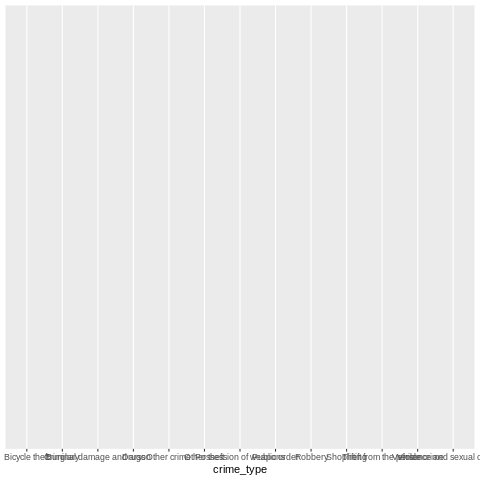

In [147]:
%%R
ggplot(df3, aes(x = crime_type))

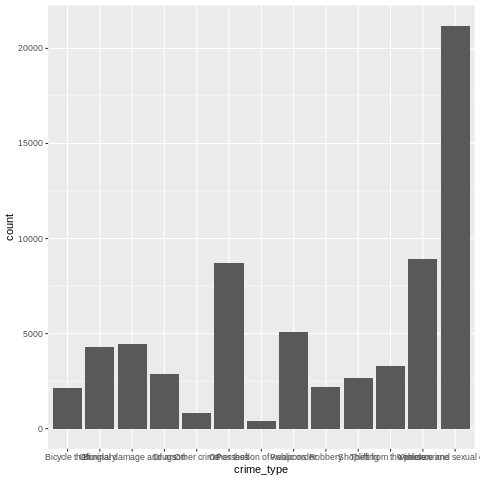

In [148]:
%%R
ggplot(df3, aes(x = crime_type)) + 
  geom_bar()

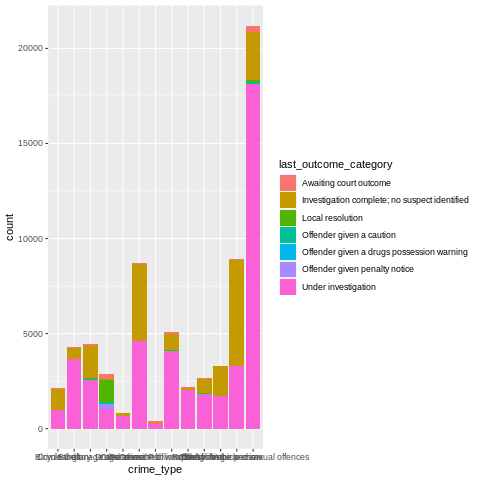

In [149]:
%%R
ggplot(df3, aes(x = crime_type, fill = last_outcome_category)) + 
  geom_bar()

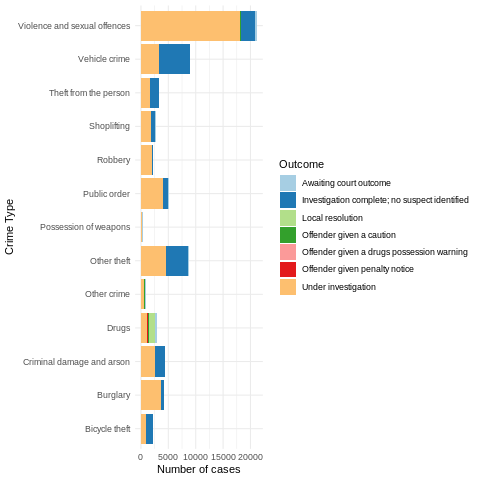

In [150]:
%%R
ggplot(df3, aes(x = crime_type, fill = last_outcome_category)) + 
  geom_bar() + 
  coord_flip() + 
  theme_minimal() + 
  xlab("Crime Type") + 
  ylab("Number of cases") + 
  scale_fill_brewer(type = "qual", palette = 3, name = "Outcome")

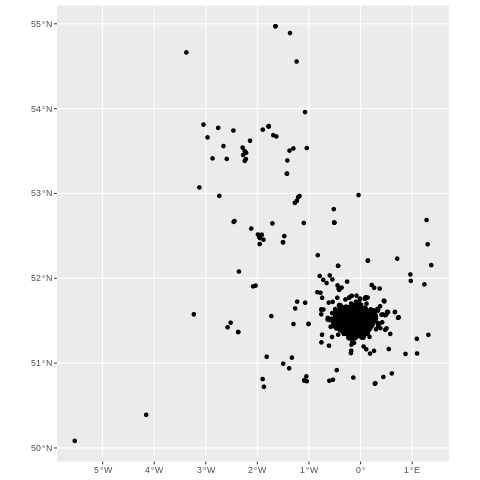

In [151]:
%%R
ggplot() + 
  geom_sf(data = dflbl_sf)

In [157]:
%%R
install.packages("rgdal", dependencies = TRUE)
#sudo apt-get install gdal-bin proj-bin libgdal-dev libproj-dev

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘geometries’, ‘jsonify’, ‘rapidjsonr’, ‘sfheaders’, ‘lazyeval’, ‘gridExtra’, ‘promises’, ‘later’, ‘geojsonsf’, ‘crosstalk’, ‘markdown’, ‘viridis’, ‘leaflet.providers’, ‘terra’, ‘httpuv’, ‘plogr’, ‘htmlwidgets’, ‘leafem’, ‘leaflet’, ‘leafpop’, ‘raster’, ‘satellite’, ‘servr’, ‘webshot’, ‘RSQLite’, ‘maptools’, ‘mapview’, ‘rgeos’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/geometries_0.2.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 52331 bytes (51 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

In [162]:
%%R
shp_name <- "lbl_lsoa11_20m.geojson"

In [163]:
%%R
lbl_lsoa <- st_read(shp_name)

Reading layer `lbl_lsoa11_20m' from data source `/content/lbl_lsoa11_20m.geojson' using driver `GeoJSON'
Simple feature collection with 169 features and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 533916 ymin: 170158.6 xmax: 541847.4 ymax: 178955.3
Projected CRS: OSGB 1936 / British National Grid


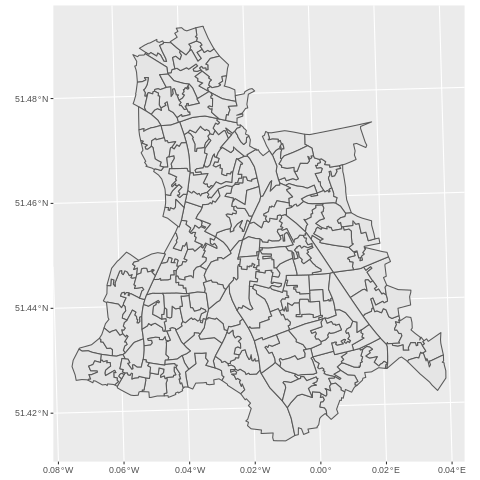

In [164]:
%%R
ggplot() + 
  geom_sf(data = lbl_lsoa)

In [166]:
%%R
nrow(lbl_lsoa)

[1] 169


In [167]:
%%R
new_object <- select(df3, lsoa_code)

In [168]:
%%R
grouped_crimes <- group_by(new_object, lsoa_code)

In [169]:
%%R
summarise(grouped_crimes, count = n())

# A tibble: 5,053 × 2
   lsoa_code count
   <chr>     <int>
 1 E01000001     2
 2 E01000005     8
 3 E01000006     2
 4 E01000007    35
 5 E01000008    26
 6 E01000009    22
 7 E01000010   113
 8 E01000011    10
 9 E01000012     8
10 E01000013    32
# … with 5,043 more rows


In [170]:
%%R
crime_per_LSOA <- summarise(grouped_crimes, count = n())

In [172]:
%%R
crimes_per_lsoa <- df3 %>%
  group_by(lsoa_code) %>%
  summarise(count=n())

In [174]:
%%R
lbl_lsoa <- left_join(lbl_lsoa, crimes_per_lsoa, by = c("LSOA11CD"="lsoa_code"))

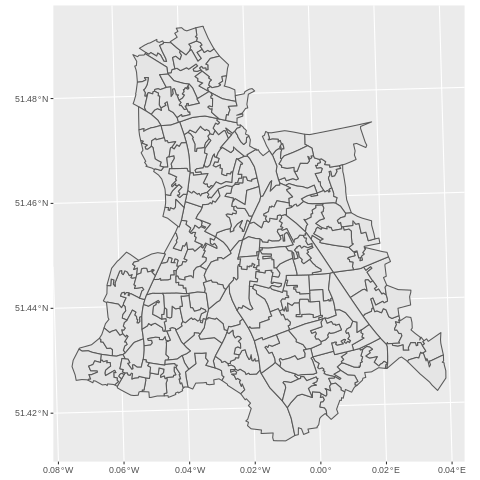

In [175]:
%%R
ggplot() + 
geom_sf(data = lbl_lsoa)

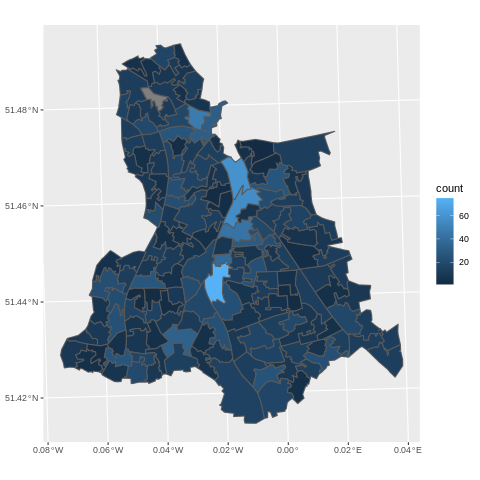

In [176]:
%%R
ggplot() + 
geom_sf(data = lbl_lsoa, aes(fill = count))

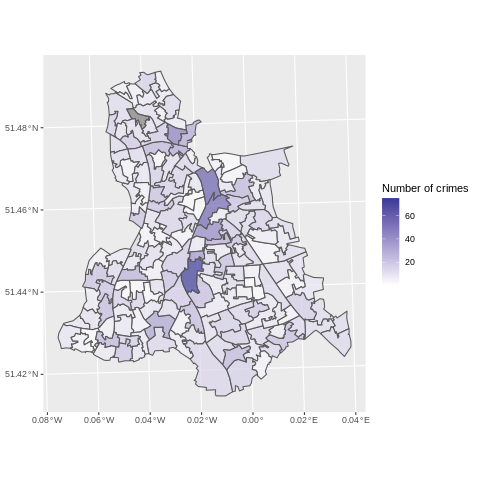

In [178]:
%%R
ggplot() + 
  #annotation_map_tile() +  # add basemap
geom_sf(data = lbl_lsoa, aes(fill = count), alpha = 0.7) + # opacity
  scale_fill_gradient2(name ="Number of crimes") #use scale_fill_gradient2() for a different palette and name the variable on the legend